Importing  relevant libraries, mounting drive and reading the data file



In [ ]:
!pip install pandas==1.3.5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
pd.show_versions()

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)



INSTALLED VERSIONS
------------------
commit           : 66e3805b8cabe977f40c05259cc3fcf7ead5687d
python           : 3.7.12.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.144+
Version          : #1 SMP Tue Dec 7 09:58:10 PST 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.3.5
numpy            : 1.21.5
pytz             : 2018.9
dateutil         : 2.8.2
pip              : 21.1.3
setuptools       : 57.4.0
Cython           : 0.29.28
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.6
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1.

# Mounting the drive and importing the file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfpart1=pd.read_csv(r"/content/drive/MyDrive/Mandar/Project/nl_data_2021_35k_random_rl.gz",sep='\t',header=None)

Adding header to the dataset

In [ ]:
dfpart1.columns=['Login','login_freq_in_OND21','gender','age','account_age','nl_id','sender','subject','nl_category','sub_length','sub_no_of_words','percentage_used','sender_name_brand','sender_name_rediff','sender_name_person','sender_name_others','download','nl_open','download_timing','open_timing','device_type_for_open']

In [ ]:
dfpart1.head()

,Login,login_freq_in_OND21,gender,age,account_age,nl_id,sender,subject,nl_category,sub_length,...,percentage_used,sender_name_brand,sender_name_rediff,sender_name_person,sender_name_others,download,nl_open,download_timing,open_timing,device_type_for_open
0,740a6ff79f838c419257c14ddd125b95,54.0,m,35.0,14.0,99.101044.newsletters,5paisa <5paisa@rediffnewsletters.com>,Trading A/c: Lowest Cost Great Offerings,bfsi_equity,41,...,0,1,0,0,0,1,1,2021-08-13 07:16:55,2021-08-14 21:19:47,NG_APP
1,1562700b0275bbf7bc44a0928ab0e355,84.0,m,46.0,8.0,99.100229.newsletters,5paisa <5paisa@rediffnewsletters.com>,Demat A/c In Just 5 mins,bfsi_equity,24,...,0,1,0,0,0,1,1,2021-07-15 14:09:48,2021-07-15 14:10:17,PCWEB_CONGO
2,8fd326a33753f0cec9cbbef09f47b531,81.0,m,55.0,20.0,99.94533.newsletters,Family Health Plan <iffcotokiohealth@rediffnew...,Complete family cover in a single plan,bfsi_health_ins,38,...,0,0,0,0,1,1,2,2021-02-07 20:11:55,2021-02-07 20:15:13,POP
3,f6669c0ee30f7101b5778c6e0ad0a41a,87.0,m,50.0,11.0,99.95636.newsletters,MEDLABS <medlabs@rediffnewsletters.com>,Limit risk of health complications,health,34,...,0,1,0,0,0,1,1,2021-02-27 18:55:51,2021-02-27 18:57:03,NG_APP
4,81cfc8db60cfd5ab167ef74705be1093,76.0,m,42.0,15.0,99.98875.newsletters,5paisa <5paisa@rediffnewsletters.com>,Stock market is calling Start investing,bfsi_equity,40,...,0,1,0,0,0,1,1,2021-06-02 08:50:19,2021-06-02 08:51:32,POP


In [ ]:
dfpart1.shape

(9569374, 21)

Describing the variables

In [ ]:
dfpart1.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,login_freq_in_OND21,age,account_age,sub_length,sub_no_of_words,percentage_used,sender_name_brand,sender_name_rediff,sender_name_person,sender_name_others,download,nl_open
count,9386736.00,9556822.00,9377551.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00
mean,72.98,43.29,13.88,37.31,6.56,0.10,0.62,0.00,0.00,0.37,1.44,0.04
std,26.32,9.30,4.07,5.29,1.35,0.30,0.49,0.00,0.00,0.48,0.93,0.28
min,1.00,-48.00,0.00,20.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,63.00,37.00,12.00,34.00,6.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,87.00,43.00,14.00,38.00,7.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
75%,92.00,49.00,16.00,41.00,7.00,0.00,1.00,0.00,0.00,1.00,2.00,0.00
max,92.00,111.00,22.00,62.00,12.00,1.00,1.00,0.00,0.00,1.00,73.00,121.00


In [ ]:
dfpart1.columns

Index(['Login', 'login_freq_in_OND21', 'gender', 'age', 'account_age', 'nl_id',
       'sender', 'subject', 'nl_category', 'sub_length', 'sub_no_of_words',
       'percentage_used', 'sender_name_brand', 'sender_name_rediff',
       'sender_name_person', 'sender_name_others', 'download', 'nl_open',
       'download_timing', 'open_timing', 'device_type_for_open'],
      dtype='object')

In [ ]:
dfpart1.dtypes

Login                    object
login_freq_in_OND21     float64
gender                   object
age                     float64
account_age             float64
nl_id                    object
sender                   object
subject                  object
nl_category              object
sub_length                int64
sub_no_of_words           int64
percentage_used           int64
sender_name_brand         int64
sender_name_rediff        int64
sender_name_person        int64
sender_name_others        int64
download                  int64
nl_open                   int64
download_timing          object
open_timing              object
device_type_for_open     object
dtype: object

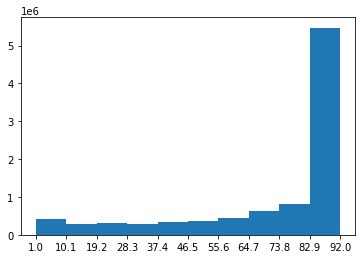

In [ ]:
n, bins, patches = plt.hist(dfpart1.login_freq_in_OND21)
plt.xticks(bins)
plt.show()

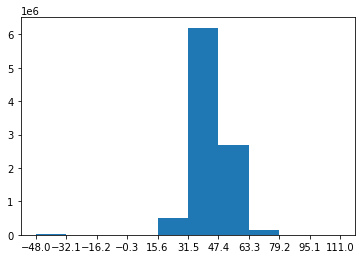

In [ ]:
n, bins, patches = plt.hist(dfpart1.age)
plt.xticks(bins)
plt.show()

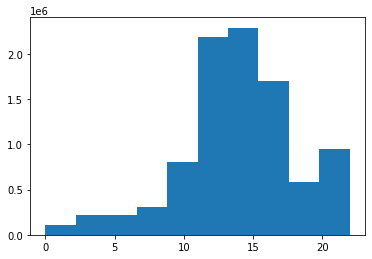

In [ ]:
n, bins, patches = plt.hist(dfpart1.account_age)
plt.show()

Addressing null values

In [ ]:
dfpart1.isnull()

,Login,login_freq_in_OND21,gender,age,account_age,nl_id,sender,subject,nl_category,sub_length,...,percentage_used,sender_name_brand,sender_name_rediff,sender_name_person,sender_name_others,download,nl_open,download_timing,open_timing,device_type_for_open
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9569369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
9569370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
9569371,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
9569372,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [ ]:
dfpart1['login_freq_in_OND21'].isnull().sum()

182638

In [ ]:
dfpart1['login_freq_in_OND21'].mode().values[0]

92.0

In [ ]:
dfpart1['login_freq_in_OND21']=dfpart1['login_freq_in_OND21'].fillna(dfpart1['login_freq_in_OND21'].mode().values[0])


In [ ]:
dfpart1['account_age'].isnull().sum()

191823

In [ ]:
dfpart1['account_age'].mode().values[0]

15.0

In [ ]:
dfpart1['account_age']=dfpart1['account_age'].fillna(dfpart1['account_age'].mode().values[0])


In [ ]:
dfpart1['age'].isnull().sum()

12552

In [ ]:
dfpart1['age'].mode().values[0]

41.0

In [ ]:
dfpart1['age']=dfpart1['age'].fillna(dfpart1['age'].mode().values[0])


Changing datatype from float to integer

In [ ]:
dfpart1["login_freq_in_OND21"] = dfpart1["login_freq_in_OND21"].astype(int)

In [ ]:
dfpart1["account_age"] = dfpart1["account_age"].astype(int)

In [ ]:
dfpart1["age"] = dfpart1["age"].astype(int)

In [ ]:
dfpart1.dtypes

Login                   object
login_freq_in_OND21      int64
gender                  object
age                      int64
account_age              int64
nl_id                   object
sender                  object
subject                 object
nl_category             object
sub_length               int64
sub_no_of_words          int64
percentage_used          int64
sender_name_brand        int64
sender_name_rediff       int64
sender_name_person       int64
sender_name_others       int64
download                 int64
nl_open                  int64
download_timing         object
open_timing             object
device_type_for_open    object
dtype: object

Binning continuous variables

In [ ]:
age_cat = pd.cut(dfpart1.age,bins=[0,19,24,34,44,54,92],labels=['upto19yrs','20to24yrs','25to34yrs','35to44yrs','45to54yrs','55+yrs'])
dfpart1.insert(6,'age_breaks',age_cat)


In [ ]:
accountage_cat = pd.cut(dfpart1.account_age,bins=[0,2,5,10,15,22],labels=['accupto2','acc3to5yrs','acc6to10yrs','acc11to15yrs','acc15+yrs'])
dfpart1.insert(5,'account_agebreaks',accountage_cat)

Adding variable values to columns

In [ ]:
dfpart1_agebreaks = pd.get_dummies(dfpart1['age_breaks'])
dfpart1_gender = pd.get_dummies(dfpart1['gender'])
dfpart1_nl_category = pd.get_dummies(dfpart1['nl_category'])
dfpart1_device = pd.get_dummies(dfpart1['device_type_for_open'])
dfpart1_account_agebreaks = pd.get_dummies(dfpart1['account_agebreaks'])


In [ ]:
dfpart1_new = pd.concat([dfpart1, dfpart1_gender, dfpart1_nl_category, dfpart1_device, dfpart1_agebreaks, dfpart1_account_agebreaks], axis=1)

In [ ]:
dfpart1_new.columns

Index(['Login', 'login_freq_in_OND21', 'gender', 'age', 'account_age',
       'account_agebreaks', 'nl_id', 'age_breaks', 'sender', 'subject',
       'nl_category', 'sub_length', 'sub_no_of_words', 'percentage_used',
       'sender_name_brand', 'sender_name_rediff', 'sender_name_person',
       'sender_name_others', 'download', 'nl_open', 'download_timing',
       'open_timing', 'device_type_for_open', 'f', 'm', 'automobile',
       'bfsi_business_loan', 'bfsi_credit_cards', 'bfsi_equity',
       'bfsi_fixed_deposit', 'bfsi_health_ins', 'bfsi_motor_ins',
       'bfsi_mutual_funds', 'bfsi_personal_loan', 'bfsi_term_ins', 'education',
       'health', 'real_estate', 'CLASSIC', 'CORDOVA', 'MOBILEWEB',
       'MOBILEWEB_CONGO', 'NG_APP', 'PCWEB', 'PCWEB_CONGO', 'POP', 'upto19yrs',
       '20to24yrs', '25to34yrs', '35to44yrs', '45to54yrs', '55+yrs',
       'accupto2', 'acc3to5yrs', 'acc6to10yrs', 'acc11to15yrs', 'acc15+yrs'],
      dtype='object')

In [ ]:
dfpart1_new.rename(columns={'m':'is_male'}, inplace=True)

In [ ]:
dfpart1n = dfpart1_new[['login_freq_in_OND21', 'age_breaks','account_agebreaks', 'subject', 'sub_length', 'sub_no_of_words', 'percentage_used', 'sender_name_brand',
       'sender_name_rediff', 'sender_name_person', 'sender_name_others',
       'download', 'nl_open', 'download_timing', 'open_timing',
       'device_type_for_open', 'is_male', 'automobile', 'bfsi_business_loan',
       'bfsi_credit_cards', 'bfsi_equity', 'bfsi_fixed_deposit',
       'bfsi_health_ins', 'bfsi_motor_ins', 'bfsi_mutual_funds',
       'bfsi_personal_loan', 'bfsi_term_ins', 'education', 'health',
       'real_estate', 'CLASSIC', 'CORDOVA',  'MOBILEWEB_CONGO', 'MOBILEWEB','PCWEB',
       'NG_APP', 'PCWEB_CONGO', 'POP', 'upto19yrs',
       '20to24yrs', '25to34yrs', '35to44yrs', '45to54yrs', '55+yrs','accupto2', 'acc3to5yrs',
       'acc6to10yrs', 'acc11to15yrs', 'acc15+yrs']]

The first part of the file

In [ ]:
dfpart1n.head(5)

,login_freq_in_OND21,age_breaks,account_agebreaks,subject,sub_length,sub_no_of_words,percentage_used,sender_name_brand,sender_name_rediff,sender_name_person,...,20to24yrs,25to34yrs,35to44yrs,45to54yrs,55+yrs,accupto2,acc3to5yrs,acc6to10yrs,acc11to15yrs,acc15+yrs
0,54,35to44yrs,acc11to15yrs,Trading A/c: Lowest Cost Great Offerings,41,6,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,84,45to54yrs,acc6to10yrs,Demat A/c In Just 5 mins,24,6,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,81,55+yrs,acc15+yrs,Complete family cover in a single plan,38,7,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,87,45to54yrs,acc11to15yrs,Limit risk of health complications,34,5,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,76,35to44yrs,acc11to15yrs,Stock market is calling Start investing,40,6,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
dfpart1n.shape

(9569374, 49)

In [ ]:
dfpart1n.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,login_freq_in_OND21,sub_length,sub_no_of_words,percentage_used,sender_name_brand,sender_name_rediff,sender_name_person,sender_name_others,download,nl_open,...,20to24yrs,25to34yrs,35to44yrs,45to54yrs,55+yrs,accupto2,acc3to5yrs,acc6to10yrs,acc11to15yrs,acc15+yrs
count,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,...,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00,9569374.00
mean,73.34,37.31,6.56,0.10,0.62,0.00,0.00,0.37,1.44,0.04,...,0.01,0.13,0.44,0.31,0.10,0.01,0.04,0.13,0.49,0.34
std,26.19,5.29,1.35,0.30,0.49,0.00,0.00,0.48,0.93,0.28,...,0.08,0.33,0.50,0.46,0.31,0.09,0.19,0.33,0.50,0.47
min,1.00,20.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,63.00,34.00,6.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,88.00,38.00,7.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,92.00,41.00,7.00,0.00,1.00,0.00,0.00,1.00,2.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00
max,92.00,62.00,12.00,1.00,1.00,0.00,0.00,1.00,73.00,121.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Processing the 'subjectlines' using NLP - Stemming, Tokenisation, Regular Expression, Lemmatization, Removal of stop words

In [ ]:
n = len(pd.unique(dfpart1n['subject']))
print(n)

1111


In [ ]:
from nltk.tokenize import word_tokenize
porter = PorterStemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [ ]:
def preprocess_text(text):
    text = re.sub(r'\d+', ' ', text)
    text = stemSentence(text)

    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)

    # Lowercase and lemmatise
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]

    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords
    print(keywords)

Vectorising the words and creating a sparse matrix

In [ ]:
# Create an instance of CountVectorizer
vectoriser = CountVectorizer(analyzer=preprocess_text,binary=True)
# Fit to the data and transform to feature matrix
dfpart1n1 = vectoriser.fit_transform(dfpart1n['subject'])
# Convert sparse matrix to dataframe
dfpart1n_1 = pd.DataFrame.sparse.from_spmatrix(dfpart1n1)
# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser.vocabulary_.items()}
# Rename each column using the mapping
for col in dfpart1n_1.columns:
    dfpart1n_1.rename(columns={col: col_map[col]}, inplace=True)
dfpart1n_1.columns

Index(['ab', 'abov', 'ac', 'access', 'account', 'accur', 'achiev', 'acquir',
       'acr', 'act',
       ...
       'worth', 'would', 'write', 'x', 'yamuna', 'year', 'yeoor', 'yet', 'yr',
       'zero'],
      dtype='object', length=939)

In [ ]:
dfpart1n_1.head(5)

,ab,abov,ac,access,account,accur,achiev,acquir,acr,act,...,worth,would,write,x,yamuna,year,yeoor,yet,yr,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfpart1n_1.shape

(9569374, 939)

Joining the sparse matrix to the original sample dataframe

In [ ]:
dfpart1_1n = pd.concat([dfpart1n, dfpart1n_1],axis=1)

In [ ]:
dfpart1_1n.head(5)

,login_freq_in_OND21,age_breaks,account_agebreaks,subject,sub_length,sub_no_of_words,percentage_used,sender_name_brand,sender_name_rediff,sender_name_person,...,worth,would,write,x,yamuna,year,yeoor,yet,yr,zero
0,54,35to44yrs,acc11to15yrs,Trading A/c: Lowest Cost Great Offerings,41,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,84,45to54yrs,acc6to10yrs,Demat A/c In Just 5 mins,24,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,81,55+yrs,acc15+yrs,Complete family cover in a single plan,38,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,45to54yrs,acc11to15yrs,Limit risk of health complications,34,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,76,35to44yrs,acc11to15yrs,Stock market is calling Start investing,40,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfpart1_1n = dfpart1_1n.drop(['agebreaks','account_agebreaks', 'subject', 'download_timing', 'open_timing','device_type_for_open'], axis=1)

KeyError: ignored

In [ ]:
dfpart1_1n.columns

In [ ]:
dfpart1_1n.head(4)

In [ ]:
dfpart1_1n.shape

In [ ]:
dfpart1_1n.to_csv (r'/content/drive/MyDrive/Mandar/Project/datafile_new.gz', index = None, header=True)

In [ ]:
import pickle
import bz2

In [ ]:
with open('9M.pkl', 'wb') as f:
    pickle.dump(dfpart1_1n, f)